            name  age  gender blood_type medical_condition date_of_admission  \
0  bobby jackson   30    male         B-            Cancer        2024-01-31   
1   leslie terry   62    male         A+           Obesity        2019-08-20   
2    danny smith   76  female         A-           Obesity        2022-09-22   
3   andrew watts   28  female         O+          Diabetes        2020-11-18   
4  adrienne bell   43  female        AB+            Cancer        2022-09-19   

             doctor                    hospital insurance_provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   billing_amount  room_number admission_type discharge_date   medication  \
0    18856.281306    

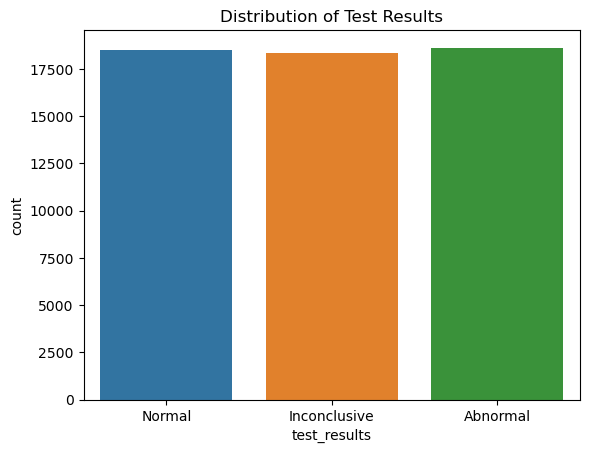

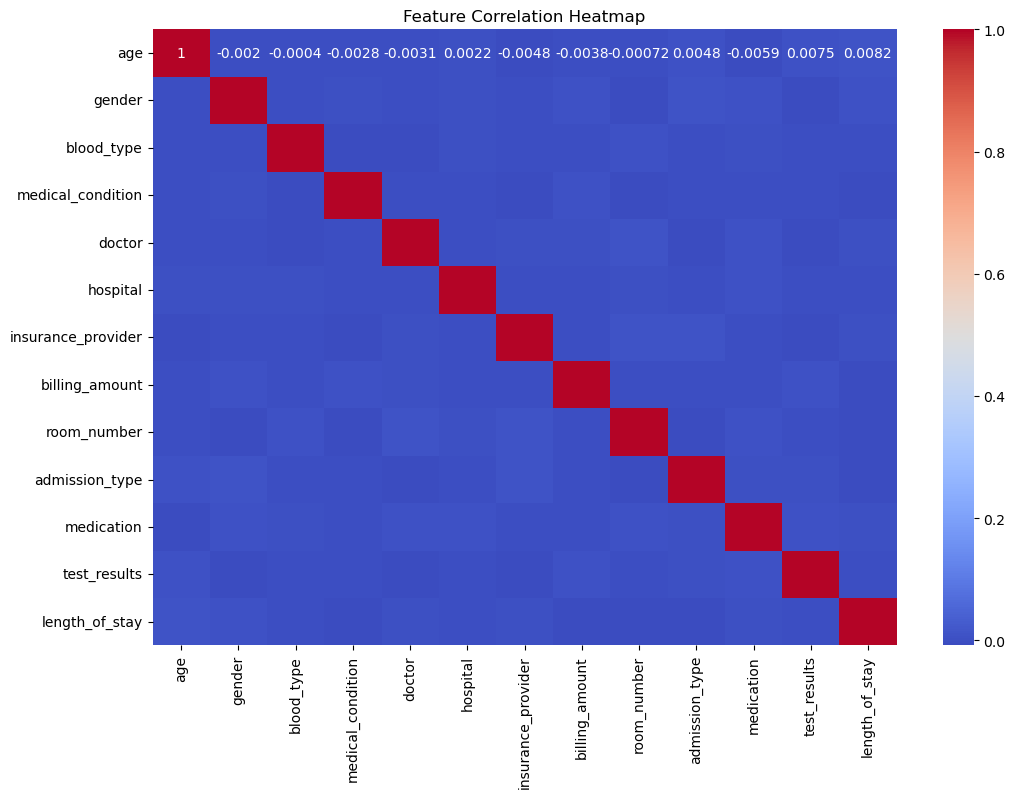

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.47      0.45      3729
           1       0.45      0.46      0.45      3754
           2       0.44      0.41      0.43      3617

    accuracy                           0.45     11100
   macro avg       0.45      0.45      0.45     11100
weighted avg       0.45      0.45      0.45     11100

Confusion Matrix:
[[1744 1039  946]
 [1117 1716  921]
 [1079 1050 1488]]


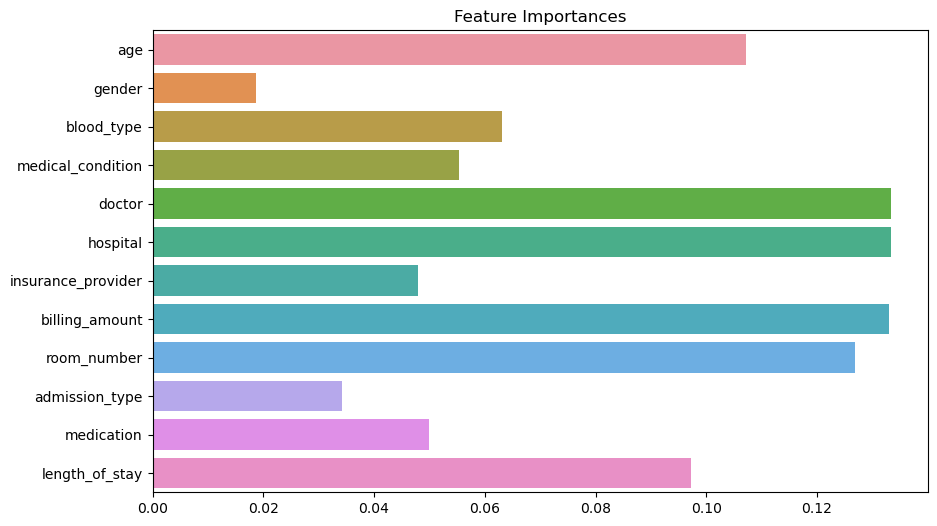

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset from the attached file
data = pd.read_csv('healthcare_dataset.csv')

# Convert column names to lowercase and replace spaces with underscores
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Convert name column to lowercase
data['name'] = data['name'].str.lower()

# Convert gender column to lowercase
data['gender'] = data['gender'].str.lower()

# Display the first few rows of the dataset
print(data.head())

# Basic dataset information
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Data visualization: Distribution of Test Results
sns.countplot(x='test_results', data=data)
plt.title('Distribution of Test Results')
plt.show()

# Convert date columns to datetime objects and handle potential parsing issues
data['date_of_admission'] = pd.to_datetime(data['date_of_admission'], errors='coerce')
data['discharge_date'] = pd.to_datetime(data['discharge_date'], errors='coerce')

# Remove rows with invalid dates
data = data.dropna(subset=['date_of_admission', 'discharge_date'])

# Calculate length of stay
data['length_of_stay'] = (data['discharge_date'] - data['date_of_admission']).dt.days

# Encode categorical variables using LabelEncoder
categorical_columns = ['gender', 'blood_type', 'medical_condition', 'doctor',
                       'hospital', 'insurance_provider', 'admission_type',
                       'medication']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Map test results to numerical values
test_results_mapping = {'Normal': 0, 'Abnormal': 1, 'Inconclusive': 2}
data['test_results'] = data['test_results'].map(test_results_mapping)

# Remove rows where 'test_results' is NaN after mapping
data = data.dropna(subset=['test_results'])

# Ensure 'test_results' is of integer type
data['test_results'] = data['test_results'].astype(int)

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Correlation heatmap to identify relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature selection and target variable definition
X = data.drop(columns=['test_results', 'name', 'date_of_admission', 'discharge_date'])
y = data['test_results']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance visualization
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()
